In [4]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Cargamos el dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\CFBPredic\tables\CFB_limpio.csv")

In [6]:
# Aeguramos el formato fecha y orden
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)

## Modelo 1A: Forecast Naïve
#### Funcionamiento: **El valor del último mes se repite hacia adelante**

In [7]:

ultimo_valor = df["cfb_cost"].iloc[-1]
horizonte = 6  # meses a predecir

# Crear fechas futuras
fechas_futuras = pd.date_range(
    start=df["date"].iloc[-1] + pd.offsets.MonthBegin(1),
    periods=horizonte,
    freq="MS"
)

# Predicción naïve (último valor repetido)
pred_naive = pd.DataFrame({
    "date": fechas_futuras,
    "pred_naive": [ultimo_valor] * horizonte
})

print("\n=== Predicción Naïve ===")
print(pred_naive)


=== Predicción Naïve ===
        date  pred_naive
0 2025-10-01      819.77
1 2025-11-01      819.77
2 2025-12-01      819.77
3 2026-01-01      819.77
4 2026-02-01      819.77
5 2026-03-01      819.77


## Modelo 1B: Moving Average (Media Móvil)
### Funcionamiento: **Promedio de los último n meses**

In [8]:
ventana = 3
df["ma3"] = df["cfb_cost"].rolling(window=ventana).mean()

ultimo_ma = df["ma3"].iloc[-1]

pred_ma = pd.DataFrame({
    "date": fechas_futuras,
    "pred_MA3": [ultimo_ma] * horizonte
})

print("\n=== Predicción Media Móvil (MA3) ===")
print(pred_ma)


=== Predicción Media Móvil (MA3) ===
        date    pred_MA3
0 2025-10-01  815.823333
1 2025-11-01  815.823333
2 2025-12-01  815.823333
3 2026-01-01  815.823333
4 2026-02-01  815.823333
5 2026-03-01  815.823333


## Graficamos los resultados obtenidos

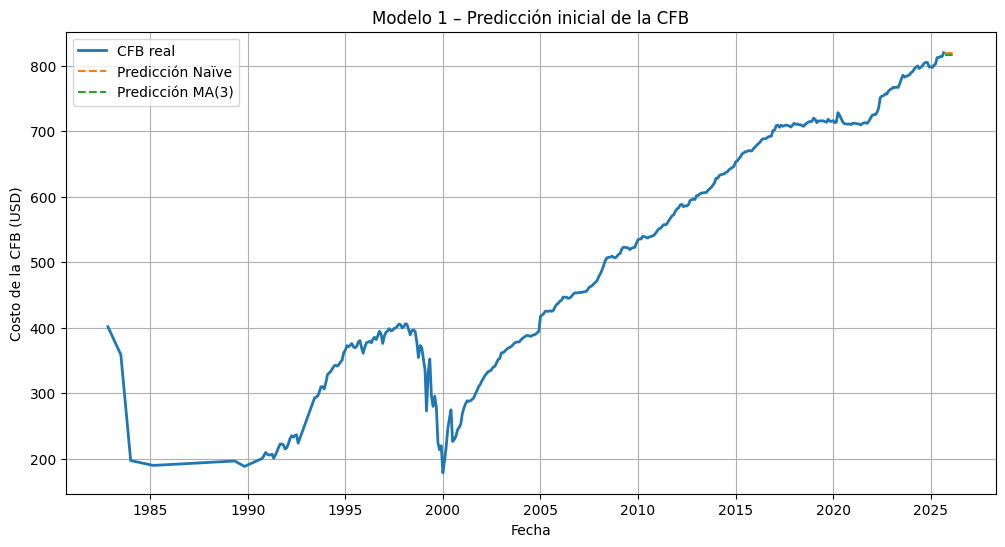

In [9]:
plt.figure(figsize=(12,6))

# Serie histórica real
plt.plot(df["date"], df["cfb_cost"], label="CFB real", linewidth=2)

# Pred Naïve
plt.plot(pred_naive["date"], pred_naive["pred_naive"],
         linestyle="--", label="Predicción Naïve")

# Pred MA3
plt.plot(pred_ma["date"], pred_ma["pred_MA3"],
         linestyle="--", label="Predicción MA(3)")

plt.title("Modelo 1 – Predicción inicial de la CFB")
plt.xlabel("Fecha")
plt.ylabel("Costo de la CFB (USD)")
plt.grid(True)
plt.legend()
plt.show()


## Hacer un zoom automático a los últimos N meses + predicciones

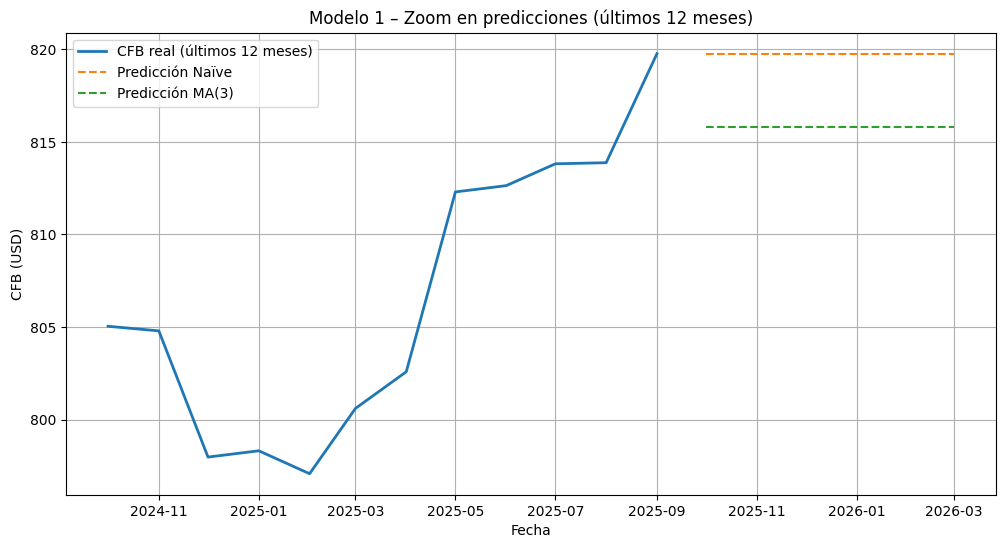

In [14]:
# ================================================================
# Graficar solo el tramo final (zoom)
# ================================================================
plt.figure(figsize=(12,6))

# Últimos 12 meses reales
n_ultimos = 12
df_zoom = df.tail(n_ultimos)

plt.plot(df_zoom["date"], df_zoom["cfb_cost"], 
         label="CFB real (últimos 12 meses)", linewidth=2)

# Pred Naive
plt.plot(pred_naive["date"], pred_naive["pred_naive"],
         linestyle="--", label="Predicción Naïve")

# Pred MA3
plt.plot(pred_ma["date"], pred_ma["pred_MA3"],
         linestyle="--", label="Predicción MA(3)")

plt.title("Modelo 1 – Zoom en predicciones (últimos 12 meses)")
plt.xlabel("Fecha")
plt.ylabel("CFB (USD)")
plt.grid(True)
plt.legend()
plt.show()


## Mostrar SOLO predicción (sin histórico)

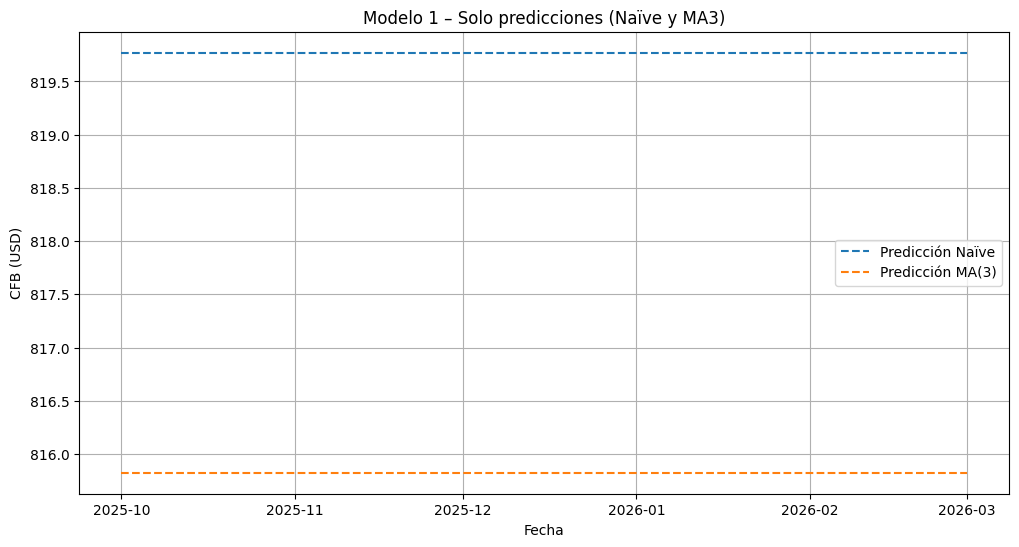

In [15]:
plt.figure(figsize=(12,6))

plt.plot(pred_naive["date"], pred_naive["pred_naive"],
         label="Predicción Naïve", linestyle="--")

plt.plot(pred_ma["date"], pred_ma["pred_MA3"],
         label="Predicción MA(3)", linestyle="--")

plt.title("Modelo 1 – Solo predicciones (Naïve y MA3)")
plt.xlabel("Fecha")
plt.ylabel("CFB (USD)")
plt.grid(True)
plt.legend()
plt.show()


## Zoom máximo automático (últimos valores + predicciones)

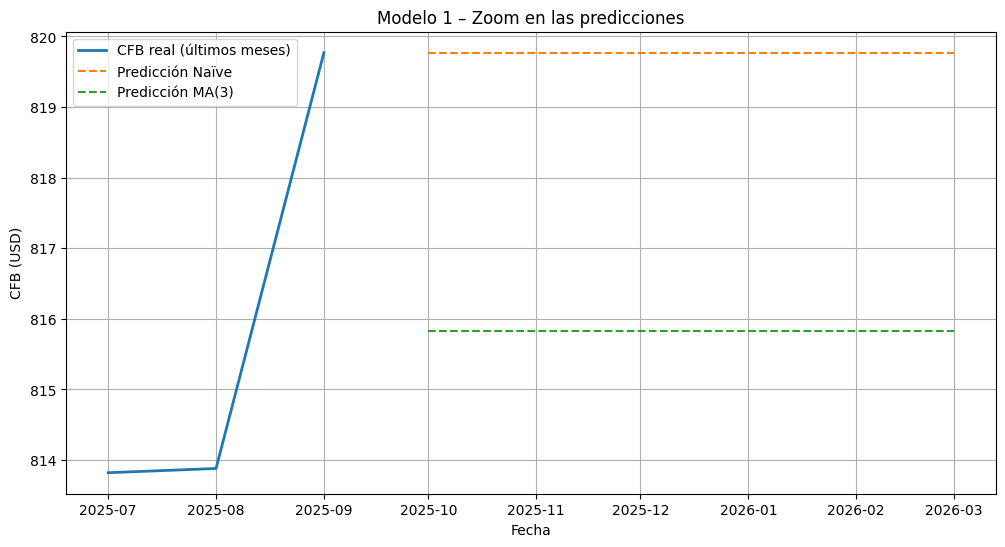

In [ ]:
plt.figure(figsize=(12,6))

df_zoom = df.tail(3)   # últimos 3 meses reales
plt.plot(df_zoom["date"], df_zoom["cfb_cost"],
         label="CFB real (últimos meses)", linewidth=2)

plt.plot(pred_naive["date"], pred_naive["pred_naive"],
         label="Predicción Naïve", linestyle="--")

plt.plot(pred_ma["date"], pred_ma["pred_MA3"],
         label="Predicción MA(3)", linestyle="--")

plt.title("Modelo 1 – Zoom en las predicciones")
plt.xlabel("Fecha")
plt.ylabel("CFB (USD)")
plt.grid(True)
plt.legend()
plt.show()